In [21]:
#!pip install --upgrade pip
!python -m gensim.downloader --download word2vec-google-news-300

2022-10-16 16:31:16,633 : __main__ : INFO : Creating C:\Users\sasan/gensim-data
2022-10-16 16:31:16,736 : __main__ : ERROR : caught non-fatal exception while trying to update gensim-data cache from 'https://raw.githubusercontent.com/RaRe-Technologies/gensim-data/master/list.json'; using local cache at 'C:\\Users\\sasan/gensim-data\\information.json' instead
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\urllib\request.py", line 1346, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1285, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1331, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1280, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "C:\ProgramData\Anaconda3\

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\gensim\downloader.py", line 219, in _load_info
    with io.open(cache_path, 'r', encoding=encoding) as fin:
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sasan/gensim-data\\information.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\gensim\downloader.py", line 529, in <module>
    data_path = load(args.download[0], return_path=True)
  File "C:\ProgramData\Anaconda3\lib\site-packages\gensim\downloader.py", line 490, in load
    file_name = _get_filename(name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\gensim\downloader.py", line 426, in _g

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import string
import keras
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from keras.models import Sequential
from keras.initializers import Constant
from keras.optimizers import Adam
from spellchecker import SpellChecker
import gensim


In [3]:
tweet=pd.read_csv(r"C:\Users\sasan\OneDrive\Desktop\Fall 2022 Folder\ALDA\Project\train.csv")
test=pd.read_csv(r"C:\Users\sasan\OneDrive\Desktop\Fall 2022 Folder\ALDA\Project\test.csv")
tweet = tweet.drop(columns=['id'])
test = test.drop(columns=['id'])
print(tweet.shape,test.shape)

(7613, 4) (3263, 3)


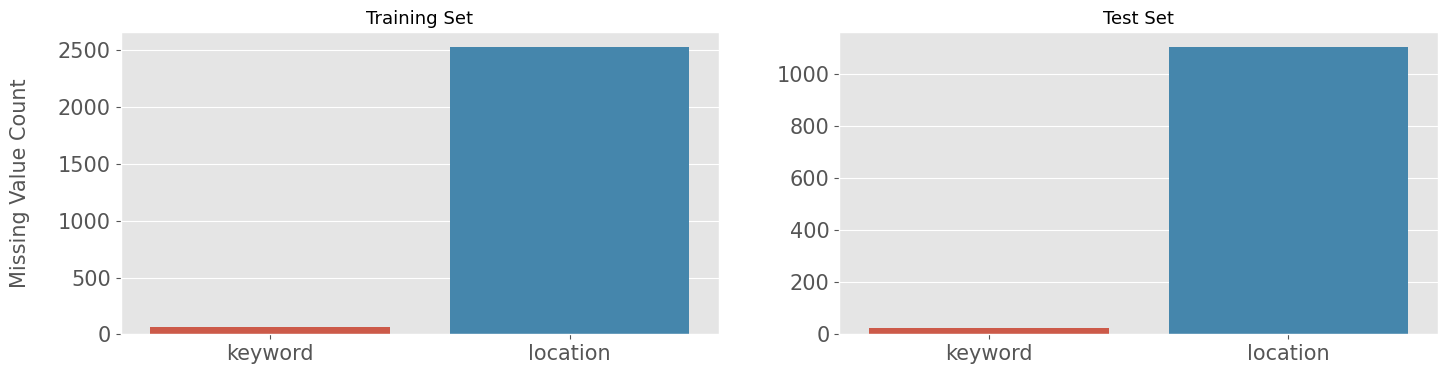

In [4]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=tweet[missing_cols].isnull().sum().index, y=tweet[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test[missing_cols].isnull().sum().index, y=test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [tweet, test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')
        
# from the chart - it makes sense to drop location as it is missing in more than 33% of data
#Locations are not automatically generated, they are user inputs. That's why location is very dirty and there are too many unique values in it. It shouldn't be used as a feature.
tweet = tweet.drop(columns=['location'])
test = test.drop(columns=['location'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

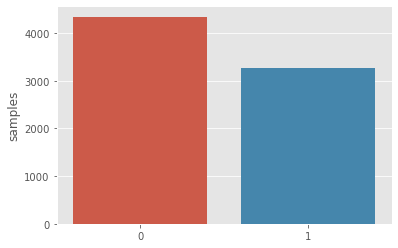

In [5]:

#count of classes - There is a class distribution.There are more tweets with class 0 ( No disaster) than class 1 ( disaster tweets)

x=tweet.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [6]:
def create_corpus(target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus




<BarContainer object of 10 artists>

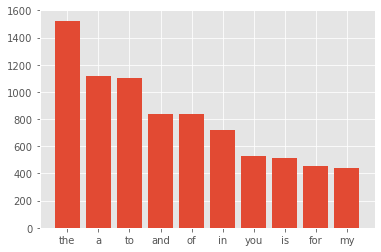

In [7]:
corpus=create_corpus(0)

# common stopwords in classs 0

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

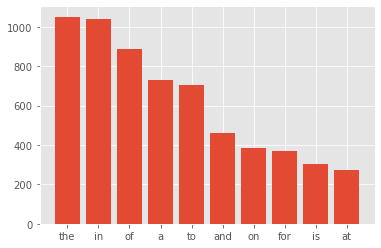

In [8]:

corpus=create_corpus(1)

# common stopwords in class 1

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    
x,y=zip(*top)
plt.bar(x,y)

In [90]:
dict(sorted(dic.items(), key=lambda x: x[1], reverse=True))

{'the': 1051,
 'in': 1037,
 'of': 888,
 'a': 730,
 'to': 706,
 'and': 462,
 'on': 386,
 'for': 368,
 'is': 302,
 'at': 273,
 'by': 244,
 'from': 206,
 'that': 166,
 'with': 159,
 'was': 158,
 'are': 150,
 'it': 143,
 'after': 140,
 'as': 139,
 'have': 134,
 'this': 110,
 'my': 107,
 'over': 107,
 'you': 103,
 'be': 103,
 'has': 98,
 'been': 93,
 'who': 89,
 'an': 84,
 'up': 83,
 'than': 82,
 'when': 75,
 'not': 74,
 'but': 73,
 'into': 69,
 'were': 69,
 'no': 68,
 'just': 65,
 'about': 64,
 'will': 64,
 'more': 55,
 'out': 54,
 'your': 53,
 'so': 49,
 'me': 49,
 'all': 48,
 'off': 47,
 'they': 44,
 'we': 43,
 'those': 43,
 'or': 42,
 'had': 42,
 "don't": 40,
 'what': 39,
 'if': 36,
 'there': 36,
 'how': 35,
 'down': 35,
 'do': 35,
 'can': 34,
 'their': 34,
 'some': 33,
 'he': 32,
 'during': 31,
 "it's": 30,
 'his': 29,
 'her': 29,
 'now': 28,
 'its': 27,
 'being': 26,
 'only': 26,
 'i': 25,
 'them': 24,
 'our': 21,
 'here': 21,
 'while': 20,
 'because': 20,
 'before': 19,
 'which': 19,

<AxesSubplot:>

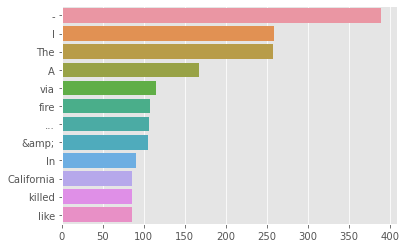

In [9]:
#common words
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#since most of the common words are stop words - a lot of cleaning is required

In [10]:
spell = SpellChecker()
def correct_spellings(text):
    if text:
        corrected_text = []
        misspelled_words = spell.unknown(text.split())
        for word in text.split():
            if word in misspelled_words and spell.correction(word) is not None:
                corrected_text.append(spell.correction(word))
            else:
                corrected_text.append(word)
        if len(corrected_text) !=0:
            return " ".join(corrected_text)
    return ""

In [50]:
def clean_tweet(text):
    # converting text to lower case
    text = text.lower()
    #removing all mentions and hashtags from the tweet
    temp = re.sub("@[a-z0-9_]+","", text)
    temp = re.sub("#[a-z0-9_]+","", temp)
    #removing all websites and urls from the tweet
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub(r"www.\S+", "", temp)
    #removing punctuations from the tweet
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    #removing all non-alphanumeric characters from the text
    temp = re.sub("[^a-z0-9]"," ", temp)
    
    #correcting spellings
    #temp = correct_spellings(temp)
    
   # removing all stopwords from the text -- #todo check accuracy with and without removing these
    temp = temp.split()
    temp = [w for w in temp if not w in stop]
    temp = " ".join(word for word in temp)
    
    #not stemming because the stemmed words will not be present in Glove and word2vec databases
    
    return temp

In [51]:
rawTexData = tweet["text"].head(10)

tweet['text']=tweet['text'].apply(lambda x : clean_tweet(x))
test['text']=test['text'].apply(lambda x : clean_tweet(x))


cleanTexData = tweet["text"].head(10)

frames = [rawTexData, cleanTexData]
result = pd.concat(frames, axis=1, sort=False)

In [52]:
result

,text,text
0,our deeds are the reason of this may allah fo...,deeds reason may allah forgive us
1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,all residents asked to shelter in place are ...,residents asked shelter place notified officer...
3,13 000 people receive evacuation orders in ca...,13 000 people receive evacuation orders califo...
4,just got sent this photo from ruby as smoke f...,got sent photo ruby smoke pours school
5,update california hwy 20 closed in both d...,update california hwy 20 closed directions due...
6,heavy rain causes flash flooding of streets ...,heavy rain causes flash flooding streets manit...
7,i m on top of the hill and i can see a fire in...,top hill see fire woods
8,there s an emergency evacuation happening now ...,emergency evacuation happening building across...
9,i m afraid that the tornado is coming to our a...,afraid tornado coming area


In [24]:
word2vec_path = "~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)


In [53]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [54]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
list_labels = tweet["target"].tolist()
tweet["tokens"] = tweet["text"].apply(tokenizer.tokenize)
tweet.head()

,keyword,text,target,tokens
0,no_keyword,deeds reason may allah forgive us,1,"[deeds, reason, may, allah, forgive, us]"
1,no_keyword,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,no_keyword,residents asked shelter place notified officer...,1,"[residents, asked, shelter, place, notified, o..."
3,no_keyword,13 000 people receive evacuation orders califo...,1,"[13, 000, people, receive, evacuation, orders,..."
4,no_keyword,got sent photo ruby smoke pours school,1,"[got, sent, photo, ruby, smoke, pours, school]"


In [96]:

embeddings = get_word2vec_embeddings(word2vec, tweet)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=2022)

In [97]:
#Logistic regression
logistic_reg = LogisticRegression(penalty='l2', 
                                        solver='saga', 
                                        random_state = 2022)  

logistic_reg.fit(X_train_word2vec,y_train_word2vec)

LogisticRegression(random_state=2022, solver='saga')

In [98]:
print('LogisticRegression Train Score is   : ' ,logistic_reg.score(X_train_word2vec, y_train_word2vec))
print('LogisticRegression Test Score is    : ' ,logistic_reg.score(X_test_word2vec, y_test_word2vec))
y_pred_word2vec = logistic_reg.predict(X_test_word2vec)
print('LogisticRegression F1 Score is      : ' ,f1_score(y_test_word2vec,y_pred_word2vec))

LogisticRegression Train Score is   :  0.8098522167487685
LogisticRegression Test Score is    :  0.8003939592908733
LogisticRegression F1 Score is      :  0.7606299212598425


In [99]:
SVClassifier = SVC(kernel= 'linear',
                   degree=3,
                   max_iter=10000,
                   C=2, 
                   random_state = 2022)

SVClassifier.fit(X_train_word2vec,y_train_word2vec)

print("SVClassifier model run successfully")

SVClassifier model run successfully


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [100]:
models = [logistic_reg, SVClassifier]

for model in models:
    print(type(model).__name__,'Train Score is   : ' ,model.score(X_train_word2vec, y_train_word2vec))
    print(type(model).__name__,'Test Score is    : ' ,model.score(X_test_word2vec, y_test_word2vec))
    y_pred_word2vec = model.predict(X_test_word2vec)
    print(type(model).__name__,'F1 Score is      : ' ,f1_score(y_test_word2vec,y_pred_word2vec))
    print('**************************************************************')

LogisticRegression Train Score is   :  0.8098522167487685
LogisticRegression Test Score is    :  0.8003939592908733
LogisticRegression F1 Score is      :  0.7606299212598425
**************************************************************
SVC Train Score is   :  0.8085385878489326
SVC Test Score is    :  0.8017071569271176
SVC F1 Score is      :  0.7595541401273885
**************************************************************
